In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [2]:
df = pd.read_csv('datasetnya/Wine Quality.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
df.duplicated().sum()

np.int64(240)

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
round(df.describe(), 2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.00,1359.00,1359.00,1359.00,1359.00,1359.00,1359.00,1359.00,1359.00,1359.00,1359.00,1359.00
mean,8.31,0.53,0.27,2.52,0.09,15.89,46.83,1.00,3.31,0.66,10.43,5.62
std,1.74,0.18,0.20,1.35,0.05,10.45,33.41,0.00,0.16,0.17,1.08,0.82
min,4.60,0.12,0.00,0.90,0.01,1.00,6.00,0.99,2.74,0.33,8.40,3.00
25%,7.10,0.39,0.09,1.90,0.07,7.00,22.00,1.00,3.21,0.55,9.50,5.00
50%,7.90,0.52,0.26,2.20,0.08,14.00,38.00,1.00,3.31,0.62,10.20,6.00
75%,9.20,0.64,0.43,2.60,0.09,21.00,63.00,1.00,3.40,0.73,11.10,6.00
max,15.90,1.58,1.00,15.50,0.61,72.00,289.00,1.00,4.01,2.00,14.90,8.00


In [9]:
numbers = df.select_dtypes(include = ['number']).columns

### EDA

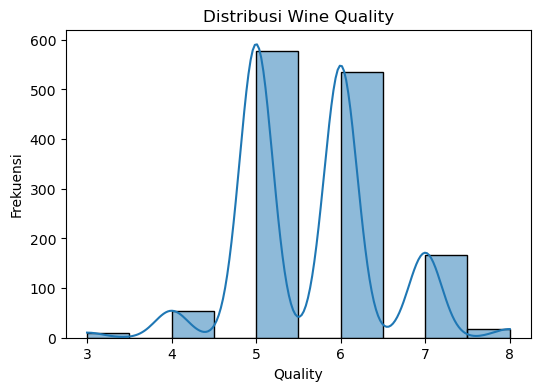

In [10]:
plt.figure(figsize=(6,4))
sns.histplot(df["quality"], kde=True, bins=10)
plt.title("Distribusi Wine Quality")
plt.xlabel("Quality")
plt.ylabel("Frekuensi")
plt.show()

- Mayoritas wine memiliki nilai kualitas pada rentang 5–6, menunjukkan dominasi kualitas menengah.
- Jumlah wine dengan kualitas sangat rendah atau sangat tinggi relatif lebih sedikit.
- Sebaran data lebih banyak terkonsentrasi pada nilai tengah dan tidak menyebar secara merata.

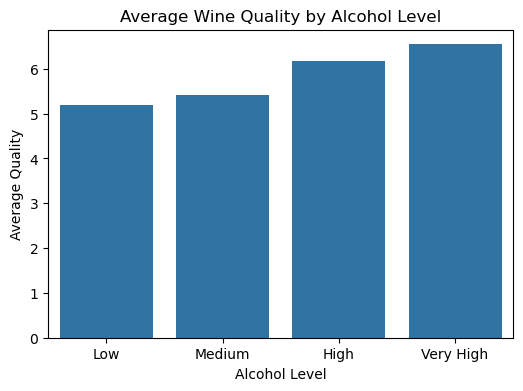

In [11]:
# membuat kategori alcohol (binning)
df["alcohol_level"] = pd.cut(
    df["alcohol"],
    bins=[0, 9, 11, 13, 20],
    labels=["Low", "Medium", "High", "Very High"]
)

plt.figure(figsize=(6,4))
sns.barplot(
    x="alcohol_level",
    y="quality",
    data=df,
    errorbar=None
)
plt.title("Average Wine Quality by Alcohol Level")
plt.xlabel("Alcohol Level")
plt.ylabel("Average Quality")
plt.show()

- Wine dengan alcohol level rendah memiliki rata-rata kualitas paling rendah.
- Rata-rata kualitas meningkat seiring naiknya kadar alkohol.
- Alcohol level High–Very High memiliki kualitas paling baik secara konsisten.
- Alcohol memiliki pengaruh signifikan terhadap kualitas wine.

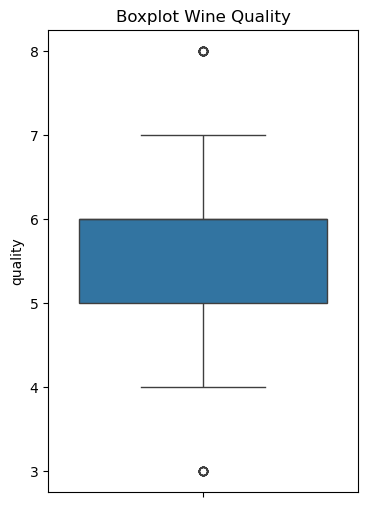

In [12]:
plt.figure(figsize=(4,6))
sns.boxplot(y=df["quality"])
plt.title("Boxplot Wine Quality")
plt.show()

- Boxplot digunakan untuk mendeteksi outlier.
- Tidak terlihat outlier ekstrem pada quality.
- Data target relatif stabil

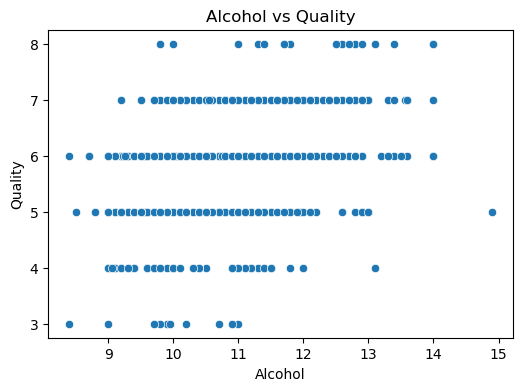

In [13]:
# Hubungan alkohol terhadap kualitas wine

plt.figure(figsize=(6,4))
sns.scatterplot(x=df['alcohol'], y=df['quality'])
plt.title("Alcohol vs Quality")
plt.xlabel("Alcohol")
plt.ylabel("Quality")
plt.show()

Terlihat tren positif: semakin tinggi alcohol, kualitas wine cenderung meningkat.

Pola cukup linear meskipun terdapat variasi.

In [14]:
#Hitung Q1, Q3, dan IQR untuk kolom numerik
Q1 = df[numbers].quantile(0.25)
Q3 = df[numbers].quantile(0.75)
IQR = Q3 - Q1

#Tentukan batas bawah dan atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Data sebelum: ", df.shape[0], "baris")

#Hapus baris yang memiliki outlier di salah satu kolo numerik
df = df[~((df[numbers] < lower_bound) | (df[numbers] > upper_bound)).any(axis=1)]

print("Data sesudah: ", df.shape[0], "baris")

Data sebelum:  1359 baris
Data sesudah:  1005 baris


In [15]:
numbers = df.select_dtypes(include = ['number']).columns

In [16]:
numbers

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [17]:
df = df[numbers]

### Koleniaritas

<Axes: >

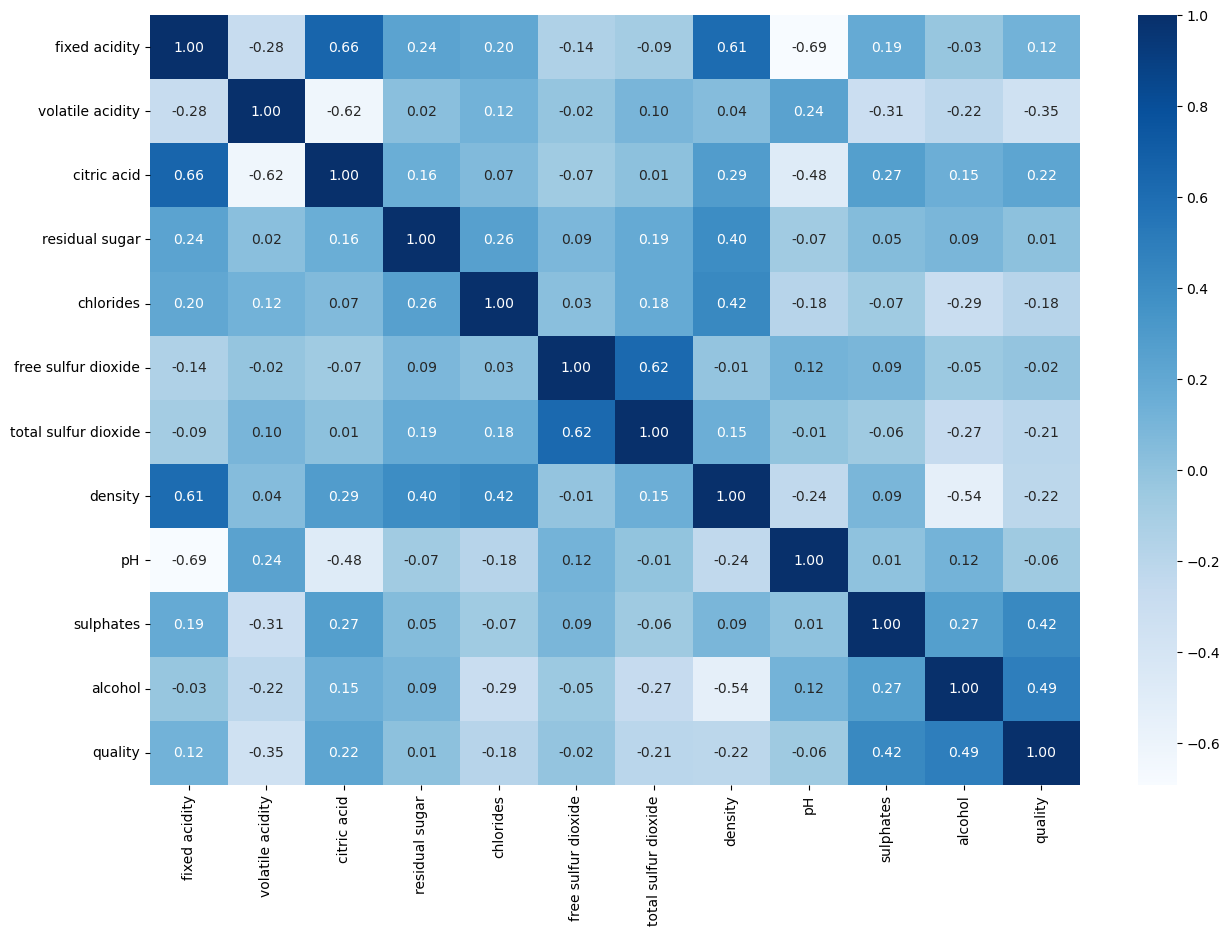

In [18]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f', annot_kws={"size": 10})

In [19]:
x = df.drop(columns ='quality')

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data['feature'] = x.columns
vif_data['VIF'] = [variance_inflation_factor(x.values, i)
                  for i in range(x.shape[1])]
vif_data

,feature,VIF
0,fixed acidity,104.352360
1,volatile acidity,20.992539
2,citric acid,8.669747
3,residual sugar,30.894684
4,chlorides,35.777397
5,free sulfur dioxide,7.073771
6,total sulfur dioxide,7.403792
7,density,1938.766192
8,pH,1390.909106
9,sulphates,38.817311


In [21]:
x = df.drop(columns = ['density', 'pH', 'quality'])
y = df['quality']

In [22]:
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.58,9.8
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.56,9.4


In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

print('Jumlah Data Train:', len(x_train))
print('Jumlah Data Test:', len(x_test))

Jumlah Data Train: 804
Jumlah Data Test: 201


In [39]:
x_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol
117,7.8,0.560,0.12,2.0,0.082,7.0,28.0,0.50,9.4
47,8.7,0.290,0.52,1.6,0.113,12.0,37.0,0.58,9.5
443,10.0,0.440,0.49,2.7,0.077,11.0,19.0,0.63,11.6
835,7.6,0.665,0.10,1.5,0.066,27.0,55.0,0.51,9.3
1048,9.3,0.490,0.36,1.7,0.081,3.0,14.0,0.78,10.9


In [40]:
x_test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol
1492,6.2,0.650,0.06,1.6,0.050,6.0,18.0,0.54,11.95
1019,7.0,0.500,0.14,1.8,0.078,10.0,23.0,0.61,10.40
1101,7.4,0.490,0.27,2.1,0.071,14.0,25.0,0.63,12.00
844,9.9,0.250,0.46,1.7,0.062,26.0,42.0,0.83,10.60
602,7.7,0.835,0.00,2.6,0.081,6.0,14.0,0.52,9.30


### Normalisasi

In [25]:
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

### Modelin dg Regresi Linear

In [26]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [27]:
coef_df = pd.DataFrame({
    'feature': x.columns,
    'coefficient': model.coef_
})

# Melihat nilai intercept
print("Intercept:", model.intercept_)

coef_df

Intercept: 2.0942482789471812


,feature,coefficient
0,fixed acidity,0.035363
1,volatile acidity,-0.816801
2,citric acid,-0.342547
3,residual sugar,-0.039686
4,chlorides,-1.826728
5,free sulfur dioxide,0.003735
6,total sulfur dioxide,-0.002397
7,sulphates,1.809498
8,alcohol,0.278375


### Tuning Hyperparameter

In [28]:
from sklearn.model_selection import GridSearchCV

#Pada Ridge
ridge = Ridge()
alphas = np.logspace(-3, 3, 20)  # λ dari 0.001 sampai 1000
param_grid = {'alpha': alphas}

grid = GridSearchCV(ridge, param_grid, cv=10, scoring='neg_mean_squared_error')
grid.fit(x_train_scaled, y_train)

print("Best alpha:", grid.best_params_)
print("Best score:", grid.best_score_)

Best alpha: {'alpha': np.float64(26.366508987303554)}
Best score: -0.34146620996394306


### Ridge

In [29]:
ridge = Ridge(alpha=26.36)
ridge.fit(x_train_scaled, y_train)
y_pred_ridge = ridge.predict(x_test_scaled)

In [30]:
coef_df_ridge = pd.DataFrame({
    'feature': x.columns,
    'coefficient': ridge.coef_
})

coef_df_ridge

,feature,coefficient
0,fixed acidity,0.043101
1,volatile acidity,-0.126923
2,citric acid,-0.046872
3,residual sugar,-0.015631
4,chlorides,-0.029379
5,free sulfur dioxide,0.032756
6,total sulfur dioxide,-0.064982
7,sulphates,0.198931
8,alcohol,0.259102


In [31]:
# Prediksi
y_pred = ridge.predict(x_test_scaled)

# MAE
mae_ridge = mean_absolute_error(y_test, y_pred)

# MAPE (gunakan rumus manual karena sklearn tidak menyediakan)
mape_ridge = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# RMSE
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred))

# R2 Score
r2_ridge = ridge.score(x_test_scaled, y_test)

print("MAE :", mae_ridge)
print("MAPE:", mape_ridge, "%")
print("RMSE:", rmse_ridge)
print("R2:", r2_ridge)

MAE : 0.4609669723909674
MAPE: 8.337763028172184 %
RMSE: 0.5791684649693576
R2: 0.35797070717096446


### Lasso

In [32]:
from sklearn.model_selection import GridSearchCV

#Pada Lasso
lasso = Lasso()
alphas = np.logspace(-3, 3, 20)  # λ dari 0.001 sampai 1000
param_grid = {'alpha': alphas}

grid = GridSearchCV(lasso, param_grid, cv=10, scoring='neg_mean_squared_error')
grid.fit(x_train_scaled, y_train)

print("Best alpha:", grid.best_params_)
print("Best score:", grid.best_score_)

Best alpha: {'alpha': np.float64(0.001)}
Best score: -0.34175947408492535


In [33]:
lasso = Lasso(alpha=0.001)
lasso.fit(x_train_scaled, y_train)
y_pred_lasso = lasso.predict(x_test_scaled)

In [34]:
coef_df_lasso = pd.DataFrame({
    'feature': x.columns,
    'coefficient': lasso.coef_
})

coef_df_lasso

,feature,coefficient
0,fixed acidity,0.047038
1,volatile acidity,-0.132436
2,citric acid,-0.056067
3,residual sugar,-0.016897
4,chlorides,-0.026519
5,free sulfur dioxide,0.030869
6,total sulfur dioxide,-0.061598
7,sulphates,0.203240
8,alcohol,0.267559


In [35]:
# Prediksi
y_pred = lasso.predict(x_test_scaled)

# MAE
mae_lasso = mean_absolute_error(y_test, y_pred)

# MAPE (gunakan rumus manual karena sklearn tidak menyediakan)
mape_lasso = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# RMSE
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred))

# R2 Score
r2_lasso = lasso.score(x_test_scaled, y_test)

print("MAE :", mae_lasso)
print("MAPE:", mape_lasso, "%")
print("RMSE:", rmse_lasso)
print("R2:", r2_lasso)

MAE : 0.4608250734221425
MAPE: 8.333849996042073 %
RMSE: 0.5802353150161919
R2: 0.3556032445984866
